In [3]:
################## SOME IMPORTANT LIBRARIES THAT I WILL TRY LATER BUT NOT USED IN THIS PROJECT............
# !pip install pyngrok -q
# !pip install torch torchvision torchaudio
# !pip install scikit-learn
# !pip install skorch


# import torch
# import torch.nn as nn
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from skorch import NeuralNetClassifier
# import pygwalker as pyg


In [ ]:

import pandas as pd
import numpy as np
import math


In [ ]:
# Read the data
data = pd.read_csv('/content/electricity_dah_prices.csv')
data

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67
...,...,...,...,...,...,...,...,...
8756,2022/12/31,19:00 - 20:00,18.11,333.00,22.09,18.11,228.00,-1.01
8757,2022/12/31,20:00 - 21:00,7.60,310.00,10.55,7.60,204.38,-1.39
8758,2022/12/31,21:00 - 22:00,3.69,270.00,5.22,3.69,175.23,-1.04
8759,2022/12/31,22:00 - 23:00,1.88,217.78,2.39,1.88,177.39,-1.07


from matplotlib import pyplot as plt
data['france'].plot(kind='hist', bins=20, title='france')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['italy'].plot(kind='hist', bins=20, title='italy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['belgium'].plot(kind='hist', bins=20, title='belgium')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['spain'].plot(kind='hist', bins=20, title='spain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='france', y='italy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='italy', y='belgium', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='belgium', y='spain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='spain', y='uk', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['france']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('france')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['italy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('italy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['belgium']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('belgium')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['spain']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('spain')

from matplotlib import pyplot as plt
data['france'].plot(kind='line', figsize=(8, 4), title='france')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['italy'].plot(kind='line', figsize=(8, 4), title='italy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['belgium'].plot(kind='line', figsize=(8, 4), title='belgium')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['spain'].plot(kind='line', figsize=(8, 4), title='spain')
plt.gca().spines[['top', 'right']].set_visible(False)

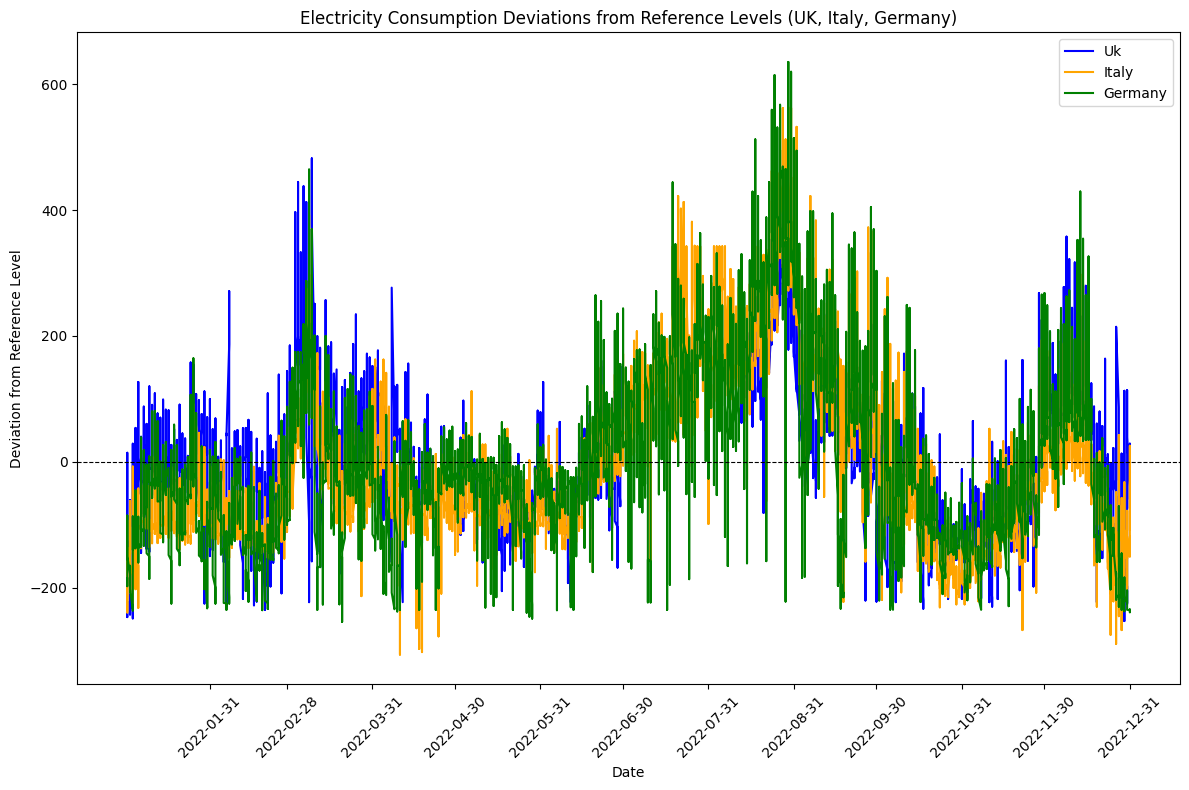

In [ ]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set a reference level for each country (mean consumption)
selected_countries = ['uk', 'italy', 'germany']

# Filter the selected countries and calculate reference levels
reference_levels = data[selected_countries].mean()

# Subtract the reference level from each country's consumption
deviations = data[selected_countries] - reference_levels

# Plotting deviations from reference levels for selected countries
plt.figure(figsize=(12, 8))

colors = ['blue', 'orange', 'green']

for country, color in zip(selected_countries, colors):
    plt.plot(data['date'], deviations[country], label=country.capitalize(), color=color)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Adding a zero line for reference
plt.xlabel('Date')
plt.ylabel('Deviation from Reference Level')
plt.title('Electricity Consumption Deviations from Reference Levels (UK, Italy, Germany)')
plt.legend()
plt.xticks(pd.date_range(start=data['date'].min(), end=data['date'].max(), freq='M'), rotation=45)  # Setting ticks in months
plt.tight_layout()
plt.show()


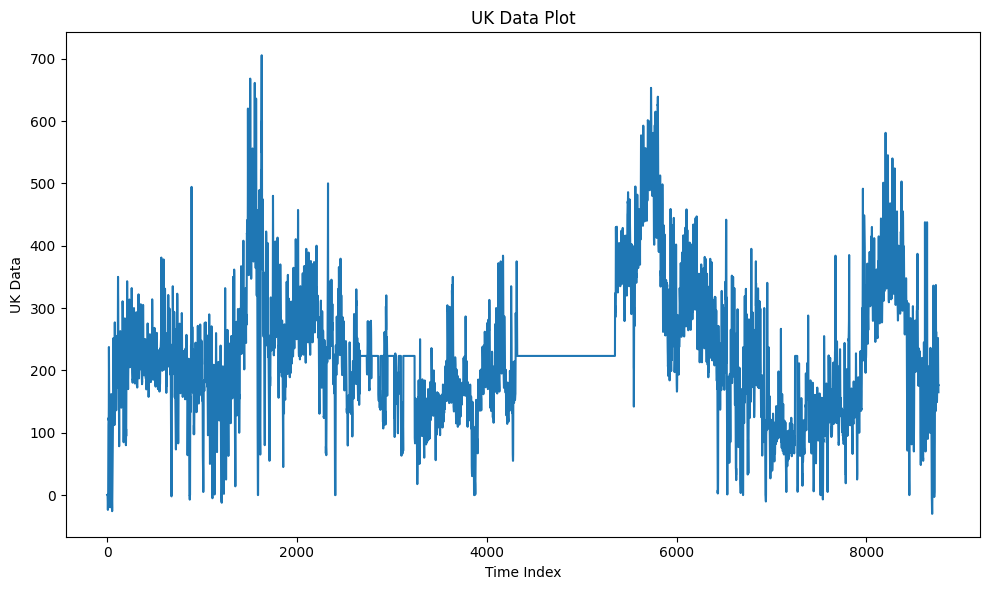

In [ ]:
import matplotlib.pyplot as plt

# Extract 'uk' column
uk_data = data['uk']

# Fill NaN values in 'uk' column with mean
uk_data = uk_data.fillna(uk_data.mean())

plt.figure(figsize=(10, 6))
plt.plot(uk_data)
plt.xlabel('Time Index')
plt.ylabel('UK Data')
plt.title('UK Data Plot')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GRU
import matplotlib.pyplot as plt

# Prepare data for LSTM models
def prepare_data_for_lstm(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 24  # Assuming we want to use the past 24 hours for forecasting


# Prepare data for LSTM models
X_lstm, y_lstm = prepare_data_for_lstm(uk_data, time_steps)

# Reshape input data to 3D (number_of_samples, time_steps, number_of_features)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.20, shuffle=False)


In [ ]:
# Build and train the LSTM model
model_lstm = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mse')

history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=22, validation_data=(X_test, y_test),
                              callbacks=[EarlyStopping(patience=5)], verbose=1)

# Build and train the GRU model (replacing BiLSTM)
model_gru = Sequential([
    GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

model_gru.compile(optimizer='adam', loss='mse')

history_gru = model_gru.fit(X_train, y_train, epochs=100, batch_size=22, validation_data=(X_test, y_test),
                            callbacks=[EarlyStopping(patience=5)], verbose=1)

# Build and train the RNN model
model_rnn = Sequential([
    SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

model_rnn.compile(optimizer='adam', loss='mse')

history_rnn = model_rnn.fit(X_train, y_train, epochs=100, batch_size=22, validation_data=(X_test, y_test),
                            callbacks=[EarlyStopping(patience=5)], verbose=1)


Epoch 1/100
318/318 [==============================] - 4s 8ms/step - loss: 4261.5767 - val_loss: 42960.4961
Epoch 2/100
318/318 [==============================] - 2s 8ms/step - loss: 6909.6353 - val_loss: 1155.8151
Epoch 3/100
318/318 [==============================] - 2s 8ms/step - loss: 2383.0525 - val_loss: 1123.5181
Epoch 4/100
318/318 [==============================] - 3s 8ms/step - loss: 1022.0360 - val_loss: 910.0141
Epoch 5/100
318/318 [==============================] - 3s 9ms/step - loss: 42290.2656 - val_loss: 44680.1562
Epoch 6/100
318/318 [==============================] - 2s 7ms/step - loss: 38953.1836 - val_loss: 1554.8997
Epoch 7/100
318/318 [==============================] - 2s 7ms/step - loss: 3259.5264 - val_loss: 1475.1044
Epoch 8/100
318/318 [==============================] - 2s 8ms/step - loss: 1322.8767 - val_loss: 1130.8680
Epoch 9/100
318/318 [==============================] - 3s 9ms/step - loss: 1128.8575 - val_loss: 1220.2999
Epoch 1/100
318/318 [=============

55/55 [==============================] - 0s 3ms/step
LSTM Model RMSE: 34.932791583386226
55/55 [==============================] - 0s 3ms/step
GRU Model RMSE: 22.496058798871488
55/55 [==============================] - 0s 2ms/step
RNN Model RMSE: 23.97962286972443


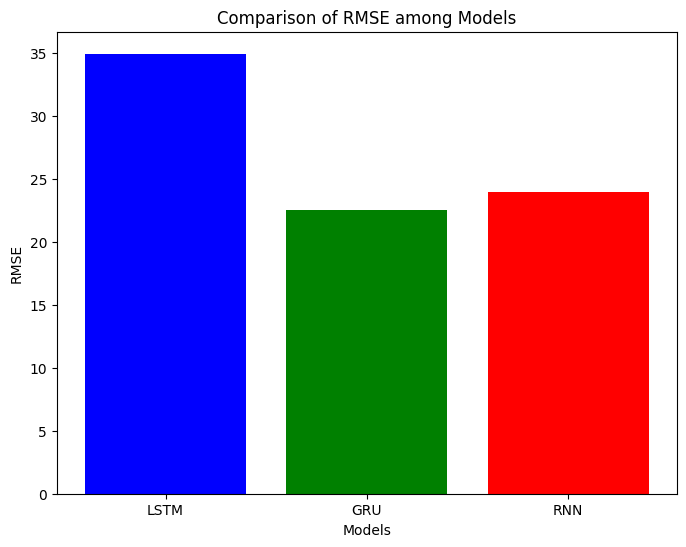

In [ ]:
# Calculate RMSE for LSTM, GRU, and RNN models
y_pred_lstm = model_lstm.predict(X_test)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print("LSTM Model RMSE:", rmse_lstm)

y_pred_gru = model_gru.predict(X_test)
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
print("GRU Model RMSE:", rmse_gru)

y_pred_rnn = model_rnn.predict(X_test)
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
print("RNN Model RMSE:", rmse_rnn)

# Plotting RMSE values
models = ['LSTM', 'GRU', 'RNN']
rmse_values = [rmse_lstm, rmse_gru, rmse_rnn]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE among Models')
plt.show()


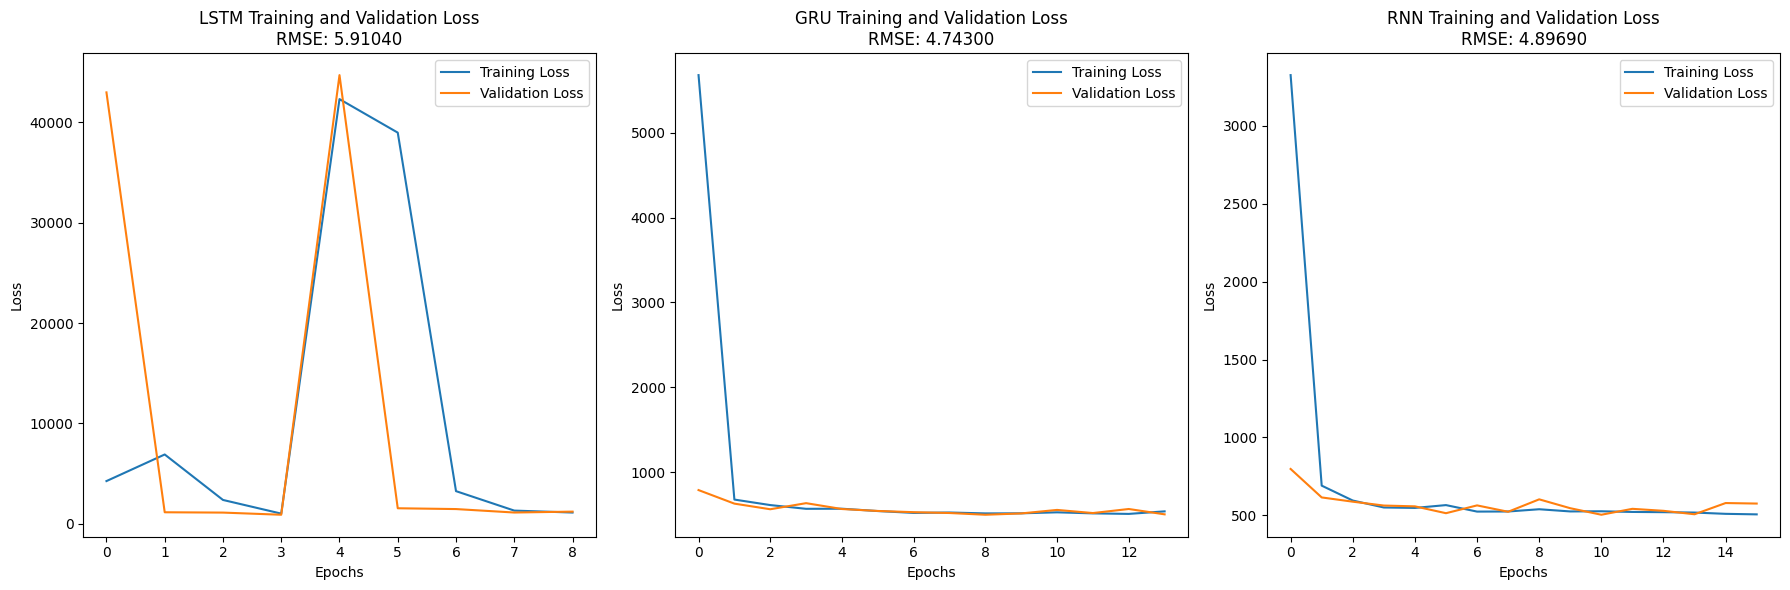

In [ ]:

# Convert RMSE values
rmse_lstm = np.sqrt(rmse_lstm)
rmse_gru = np.sqrt(rmse_gru)
rmse_rnn = np.sqrt(rmse_rnn)

# Plot training history for LSTM, GRU, and RNN models
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss\nRMSE: {:.5f}'.format(rmse_lstm))  # Display RMSE in the title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_gru.history['loss'], label='Training Loss')  # Change to history_gru
plt.plot(history_gru.history['val_loss'], label='Validation Loss')  # Change to history_gru
plt.title('GRU Training and Validation Loss\nRMSE: {:.5f}'.format(rmse_gru))  # Display RMSE in the title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss\nRMSE: {:.5f}'.format(rmse_rnn))  # Display RMSE in the title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

plt.savefig('Models_Perfromance_Comparison.png', dpi=300, bbox_inches='tight')

plt.show()


55/55 [==============================] - 0s 2ms/step


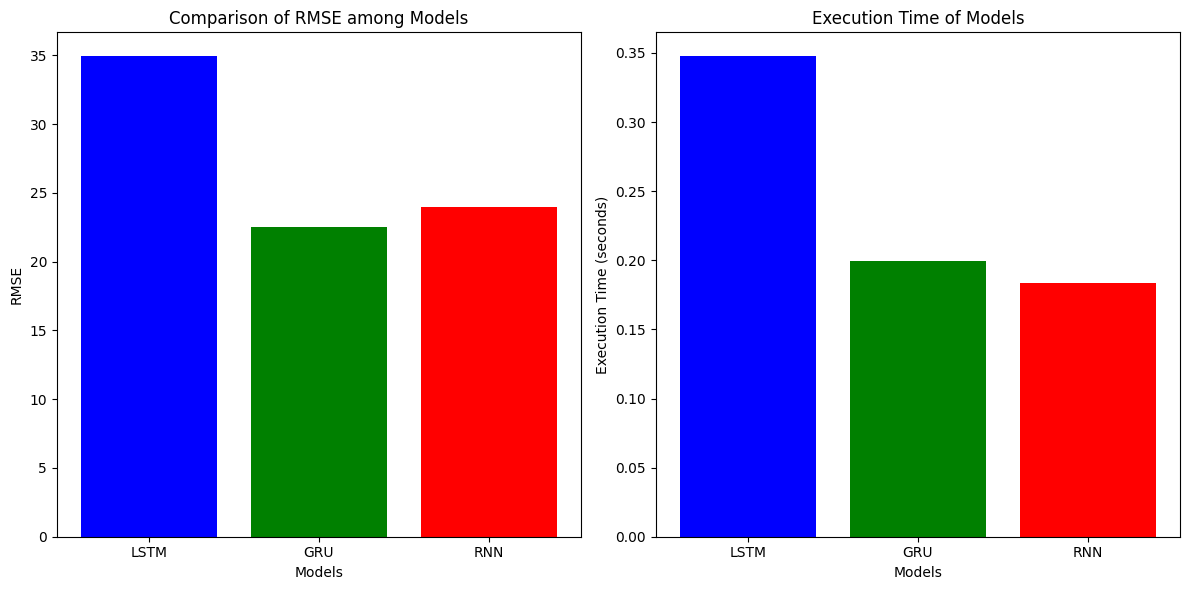

In [ ]:
import time

# Function to calculate RMSE and execution time
def calculate_rmse(model, X_test, y_test):
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    execution_time = end_time - start_time
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse, execution_time

# Calculate RMSE and execution time for LSTM, GRU, and RNN models
rmse_lstm, time_lstm = calculate_rmse(model_lstm, X_test, y_test)
rmse_gru, time_gru = calculate_rmse(model_gru, X_test, y_test)
rmse_rnn, time_rnn = calculate_rmse(model_rnn, X_test, y_test)

# Put the RMSE values into a list
rmse_values = [rmse_lstm, rmse_gru, rmse_rnn]
execution_times = [time_lstm, time_gru, time_rnn]

# Labels for the models
models = ['LSTM', 'GRU', 'RNN']

# Plotting the RMSE values and execution times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE among Models')

plt.subplot(1, 2, 2)
plt.bar(models, execution_times, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Models')

plt.tight_layout()

plt.savefig('Models_Performance_and_execution_time_comparison.png', dpi=300, bbox_inches='tight')

plt.show()


55/55 [==============================] - 0s 2ms/step


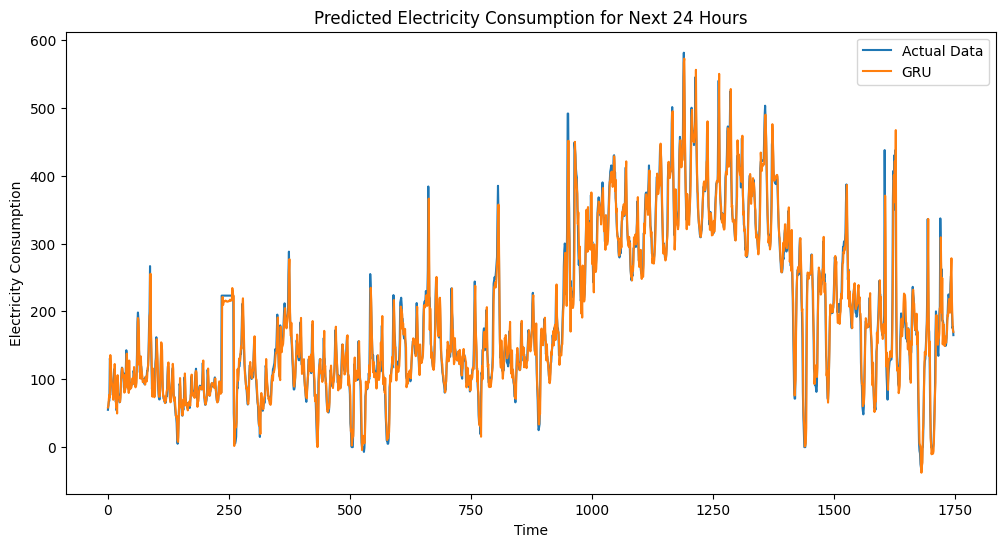

In [ ]:
# Calculate RMSE for LSTM, GRU, and RNN models
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_rnn = model_rnn.predict(X_test)

rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))

# Store the RMSE values and model names in a dictionary
rmse_values = {'LSTM': rmse_lstm, 'GRU': rmse_gru, 'RNN': rmse_rnn}

# Find the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)

# Plotting the predicted values for the best performing model
plt.figure(figsize=(12, 6))

# Plotting the actual test data
plt.plot(y_test, label='Actual Data')

# Plotting the predicted values by the best model
if best_model == 'LSTM':
    plt.plot(y_pred_lstm, label='LSTM')
elif best_model == 'GRU':
    plt.plot(y_pred_gru, label='GRU')
else:
    plt.plot(y_pred_rnn, label='RNN')

plt.title('Predicted Electricity Consumption for Next 24 Hours')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()

# Save the figure as a PNG file
plt.savefig('predicted_electricity_consumption.png', dpi=300, bbox_inches='tight')

plt.show()
